# Import Libraries

In [12]:
import os
import cv2
import random
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fungsi Menampilkan Citra

In [13]:
# Fungsi untuk menampilkan citra
def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Model K-Means

In [14]:
def kmeans_segmentation(image, k):
    pixels = image.reshape((-1, 3))  # Mengubah citra ke format 1D

    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(pixels)
    
    # Gunakan dimensi citra asli
    segmented_image = kmeans.labels_.reshape(image.shape[:2])
    return segmented_image

# Normalisasi

In [15]:
def process_image(img):
    # Mengambil properti citra
    h, w, ch = img.shape

    # Normalisasi data citra
    data = img / 255.0

    # Mengubah dimensi data
    data = data.reshape(h * w, ch)

    return data

# Pembacaan Data Citra

In [16]:
# Direktori dataset
dataset_dir = 'data/img'

# Pilih 5 citra plat nomor secara acak dari seluruh dataset
all_image_files = []
for root, dirs, files in os.walk(dataset_dir):
    all_image_files.extend([os.path.join(root, file) for file in files])

# Pilih secara acak 5 citra plat nomor
selected_images = random.sample(all_image_files, 5)

# Cetak Data Citra

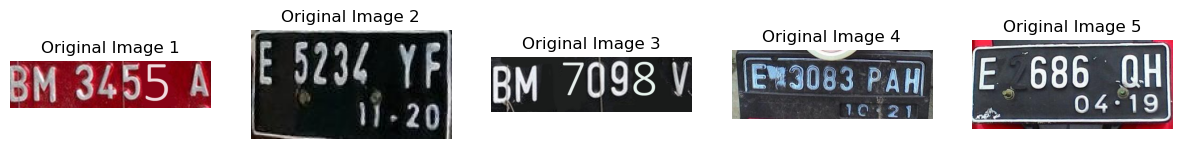

In [17]:
# Muat dan tampilkan citra-citra yang dipilih sebelum segmentasi
original_images = [cv2.imread(img) for img in selected_images]

# Menampilkan citra asli dengan judul "Original" (dalam format RGB)
fig, axes = plt.subplots(1, len(original_images), figsize=(15, 5))
for i, (ax, image) in enumerate(zip(axes, original_images), start=1):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title(f"Original Image {i}")
    ax.axis('off')
plt.show()

In [18]:
for i, original_image in enumerate(original_images):
    height, width, channels = original_image.shape
    print(f"Original Image {i + 1}:")
    print(f"Height: {height}")
    print(f"Width: {width}")
    print(f"Channels: {channels}")
    print()

Original Image 1:
Height: 258
Width: 1101
Channels: 3

Original Image 2:
Height: 83
Width: 153
Channels: 3

Original Image 3:
Height: 298
Width: 1089
Channels: 3

Original Image 4:
Height: 149
Width: 429
Channels: 3

Original Image 5:
Height: 167
Width: 377
Channels: 3



# Pre-Processing

In [19]:
# Proses setiap citra sebelum segmentasi
processed_images = [process_image(img) for img in original_images]
for i, processed_image in enumerate(processed_images):
    print(f"Data {i + 1} Shape = {processed_image.shape}")

Data 1 Shape = (284058, 3)
Data 2 Shape = (12699, 3)
Data 3 Shape = (324522, 3)
Data 4 Shape = (63921, 3)
Data 5 Shape = (62959, 3)


In [20]:
# Konversi ke ruang warna HSV
hsv_images = [cv2.cvtColor(img, cv2.COLOR_BGR2HSV) for img in original_images]

# Pra-pemrosesan: Reduksi dimensi menggunakan PCA
pca = PCA(n_components=3)
reduced_images = [pca.fit_transform(img.reshape((-1, 3))).reshape(img.shape) for img in original_images]

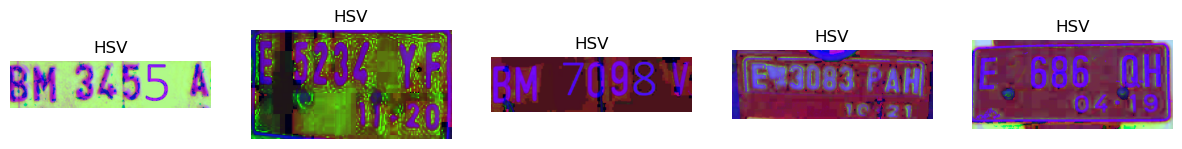

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


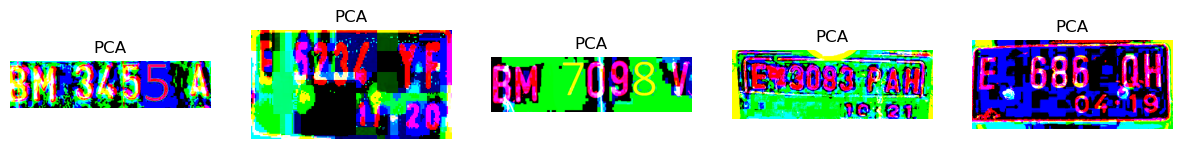

In [21]:
show_images(hsv_images, titles=['HSV']*len(hsv_images))
show_images(reduced_images, titles=['PCA']*len(reduced_images))

# Proses Segmentasi

In [51]:
# Lakukan segmentasi pada citra-citra yang telah di-preprocess
segmented_images_hsv = [kmeans_segmentation(img, 2) for img in hsv_images]

In [60]:
# Lakukan segmentasi pada citra-citra yang telah di-preprocess
segmented_images_pca = [kmeans_segmentation(img, 2) for img in reduced_images]

# Hasil Segementasi

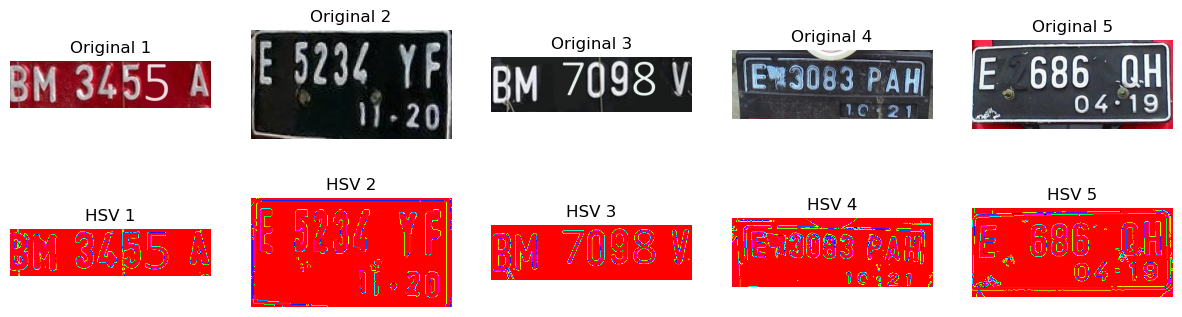

In [53]:
# Loop melalui citra-citra yang ingin diubah
for i, image in enumerate(segmented_images_hsv):
    # Konversi citra ke format 8-bit jika kedalaman citra bukan 8-bit
    if image.dtype != np.uint8:
        # Menggunakan fungsi normalize untuk mengubah rentang piksel ke 0-255
        image_8bit = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        segmented_images_hsv[i] = image_8bit

# Define the number of columns for the subplots
num_columns = len(original_images)

# Display the original and segmented images in two rows
fig, axes = plt.subplots(2, num_columns, figsize=(15, 4))

for i, (original, segmented) in enumerate(zip(original_images, segmented_images_hsv)):
    axes[0, i].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title(f'Original {i + 1}')
    axes[0, i].axis('off')

    # Tampilkan citra hasil segmentasi dalam format HSV
    axes[1, i].imshow(segmented, cmap='hsv')
    axes[1, i].set_title(f'HSV {i + 1}')
    axes[1, i].axis('off')

plt.show()



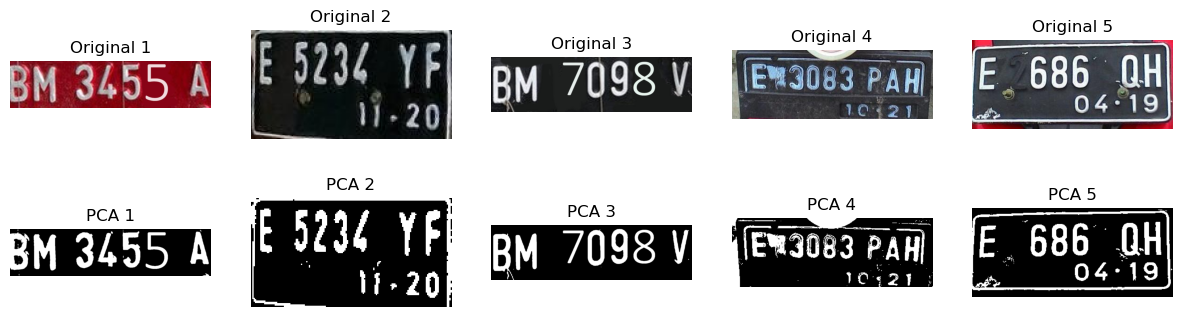

In [61]:
# Loop melalui citra-citra yang ingin diubah
for i, image in enumerate(segmented_images_pca):
    # Konversi citra ke format 8-bit jika kedalaman citra bukan 8-bit
    if image.dtype != np.uint8:
        # Menggunakan fungsi normalize untuk mengubah rentang piksel ke 0-255
        image_8bit = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        segmented_images_pca[i] = image_8bit

# Mengonversi citra-citra 8-bit kembali ke format asli (RGB)
segmented_images_rgb = [cv2.cvtColor(image, cv2.COLOR_GRAY2BGR) for image in segmented_images_pca]

# Define the number of columns for the subplots
num_columns = len(original_images)

# Display the original and segmented images in two rows
fig, axes = plt.subplots(2, num_columns, figsize=(15, 4))

for i, (original, segmented) in enumerate(zip(original_images, segmented_images_rgb)):
    axes[0, i].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title(f'Original {i + 1}')
    axes[0, i].axis('off')

    axes[1, i].imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    axes[1, i].set_title(f'PCA {i + 1}')
    axes[1, i].axis('off')

plt.show()

# Evaluasi Hasil Segmentasi

In [26]:
import pytesseract

In [63]:
# Fungsi untuk menghitung akurasi pengenalan karakter
def calculate_accuracy(ground_truth, recognized_text):
    correct_characters = sum(1 for gt_char, rec_char in zip(ground_truth, recognized_text) if gt_char == rec_char)
    total_characters = len(ground_truth)
    accuracy = correct_characters / total_characters * 100.0
    return accuracy

# Melakukan OCR untuk mengenali karakter
recognized_text1 = pytesseract.image_to_string(segmented_images_hsv[2], lang='eng')
recognized_text2 = pytesseract.image_to_string(segmented_images_pca[2], lang='eng')

# Plat asli
ground_truth = 'BM 7098 V'

# Menghitung akurasi pengenalan karakter untuk recognized_text1
accuracy1 = calculate_accuracy(ground_truth, recognized_text1)

# Menghitung akurasi pengenalan karakter untuk recognized_text2
accuracy2 = calculate_accuracy(ground_truth, recognized_text2)

print(f'Ground Truth: {ground_truth}')
print("")
print(f'HSV: {recognized_text1}')
print(f'Akurasi HSV: {accuracy1:.2f}%')
print("")
print(f'PCA: {recognized_text2}')
print(f'Akurasi PCA: {accuracy2:.2f}%')

Ground Truth: BM 7098 V

HSV: BM 7098 V

Akurasi HSV: 100.00%

PCA: BM 7098 V

Akurasi PCA: 100.00%
